# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Проект

### Описание фич
- PassengerId is the unique id of the row and it doesn't have any effect on target
- Survived is the target variable we are trying to predict (0 or 1):
1 = Survived
0 = Not Survived
- Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
1 = Upper Class
2 = Middle Class
3 = Lower Class
- Name, Sex and Age are self-explanatory
- SibSp is the total number of the passengers' siblings and spouse
- Parch is the total number of the passengers' parents and children
- Ticket is the ticket number of the passenger
- Fare is the passenger fare
- Cabin is the cabin number of the passenger
- Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
C = Cherbourg
Q = Queenstown
S = Southampton

### Постановка задачи
Предсказание количества выживших на тестовой выборке

### Оценка

Предсказания оцениваниются с помощью метрики: Accurancy (процент правильных предсказанных меток)

# Импорт датасетов

In [3]:
train = pd.read_csv(r'data\train.csv')
X_test = pd.read_csv(r'data\test.csv')
y_test = pd.read_csv(r'data\gender_submission.csv')

# Предобработка

## Информация о датасетах

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
X_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [205]:
y_test.isna().sum()

PassengerId    0
Survived       0
dtype: int64

## Объединение датасетов

In [10]:
# Объединение датасетов
test = pd.merge(X_test, y_test, how='left', left_on='PassengerId', right_on='PassengerId')
df = pd.concat([train, test], ignore_index=True)

# Проверка объединения
df.iloc[890:894]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
892,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
893,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## Визуализация данных

<AxesSubplot:>

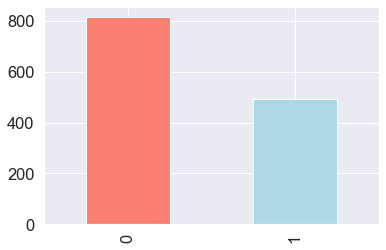

In [210]:
df['Survived'].value_counts().plot(kind='bar', color=["salmon", "lightblue"])

In [211]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [212]:
# Сравнение столбца выживших со столбцом пола человека
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,734
1,385,109


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

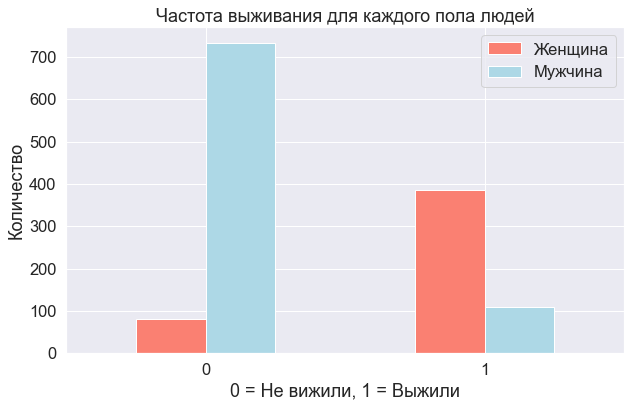

In [213]:
# Создание графика
pd.crosstab(df['Survived'], df['Sex']).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Частота выживания для каждого пола людей")
plt.xlabel("0 = Не вижили, 1 = Выжили")
plt.ylabel("Количество")
plt.legend(["Женщина", "Мужчина"])
plt.xticks(rotation=0)

In [214]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [215]:
# Сравнение столбца выживших с классом на судне
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,137,186
2,160,117
3,518,191


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

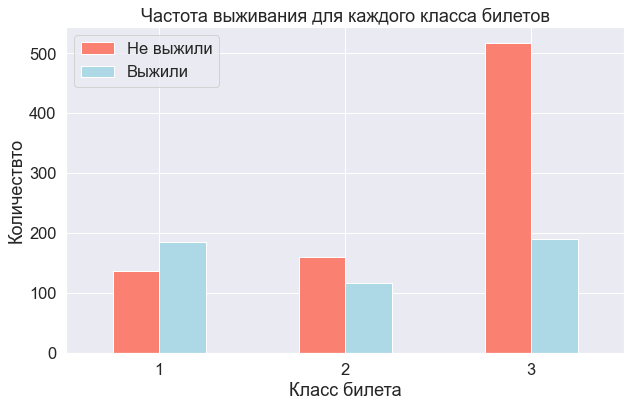

In [216]:
# Создание графика
pd.crosstab(df['Pclass'], df['Survived']).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])
plt.title("Частота выживания для каждого класса билетов")
plt.xlabel("Класс билета")
plt.ylabel("Количествто")
plt.legend(["Не выжили", "Выжили"])
plt.xticks(rotation=0)

In [217]:
# Корреляция

df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000


(7.5, -0.5)

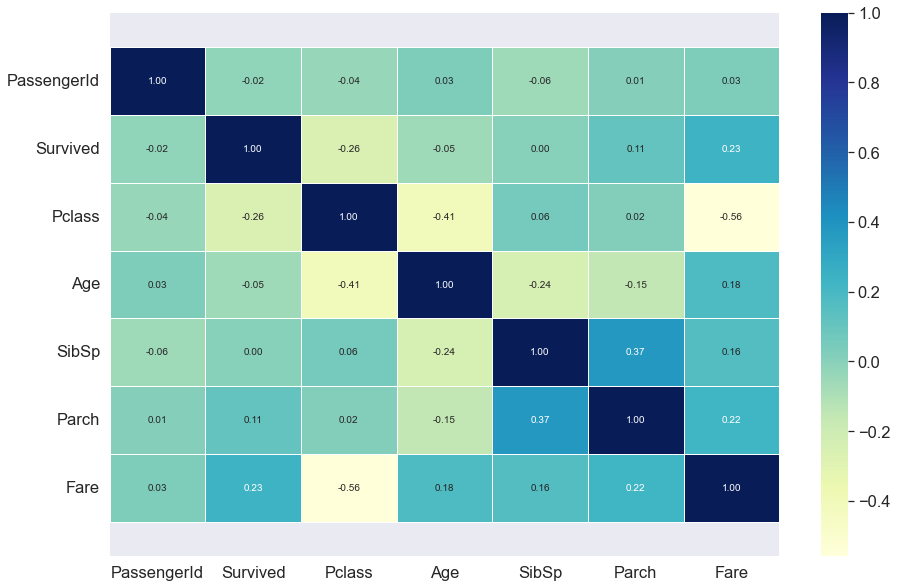

In [218]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Заполнение пропусков

## Конвертация категориальных данных в тип "Категории"

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [220]:
pd.api.types.is_string_dtype(df['Name'])

True

In [221]:
# Обнаружение категориальных столбцов
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [222]:
# Конвертация str в category
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   int64   
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   category
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   category
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    category
 11  Embarked     1307 non-null   category
dtypes: category(5), float64(2), int64(5)
memory usage: 179.9 KB


In [224]:
# Провекра пропущенных данных
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

## Заполнение категориальных и числовых данных

### Заполнение числовых данных

In [225]:
# Проверка числовых столбцов с пропусками
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
Fare


In [226]:
# Заполнение числовых пропусков медианой
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [227]:
# Проверка заполненных пропусков
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label) 

### Заполнение категориальных данных

In [228]:
# Проверка категориальных столбцов с пропусками
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [229]:
# Изменение категориальных данных в числовые и заполнение пропусков
# Прибавляем единицу, так как могут быть значения (пустые) = -1. Их просто меняем на 0
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Измнение категорий в числовые и прибавление +1
        df[label] = pd.Categorical(content).codes+1

In [230]:
# Проверка заполненных пропусков
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   int16  
 4   Sex          1309 non-null   int8   
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int16  
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   int16  
 11  Embarked     1309 non-null   int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 92.0 KB


# Разделение данных на train и test

In [232]:
train = df.iloc[:891, :]
test = df.iloc[891:, :]

In [233]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

# Обучение модели

## Простое обучение нескольких моделей

In [234]:
models = {"Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=10000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),          
          'Decision Tree Classifier': DecisionTreeClassifier()}

# Создание функции для обучения и оценки модели
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Настройка random seed
    np.random.seed(42)
    # Создания словаря 
    model_scores = {}
    # Прохождение по по моделям
    for name, model in models.items():
        # Обучение модели
        model.fit(X_train, y_train)
        # Оценка модели
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [235]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.916267942583732,
 'KNN': 0.5885167464114832,
 'Random Forest': 0.8157894736842105,
 'Decision Tree Classifier': 0.7392344497607656}

## Сравнение моделей

<AxesSubplot:>

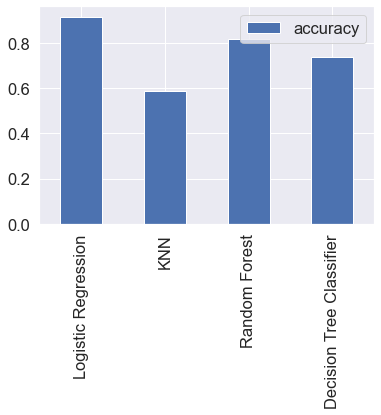

In [236]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

## Настройка гиперпараметров

In [237]:
# LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear'],
                'random_state': np.arange(0, 80, 2)}

# KNN
knn_grid = {'leaf_size': np.arange(1, 50, 4),
            'n_neighbors': np.arange(1, 30, 3),
             'p':[1,2]}

# DecisionTreeClassifier
clf_grid = {'criterion':['gini','entropy'],
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'random_state': np.arange(0, 80, 2)}

# RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'random_state': np.arange(0, 80, 2)}

### RandomizedSearchCV

In [238]:
# Сохранение результатов
model_scores_rs = []

In [239]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)
model_scores_rs.append(rs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [240]:
rs_knn_reg = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions=knn_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

rs_knn_reg.fit(X_train, y_train)
model_scores_rs.append(rs_knn_reg.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [241]:
rs_clf_reg = RandomizedSearchCV(DecisionTreeClassifier(),
                                param_distributions=clf_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

rs_clf_reg.fit(X_train, y_train)
model_scores_rs.append(rs_clf_reg.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [242]:
rs_rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

rs_rf_reg.fit(X_train, y_train)
model_scores_rs.append(rs_rf_reg.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [243]:
model_scores_rs

[0.9186602870813397,
 0.6244019138755981,
 0.8181818181818182,
 0.8086124401913876]

Наилучшая модель - Логистическая регрессия

In [244]:
y_pred = rs_log_reg.predict(X_test)

# Оценка модели

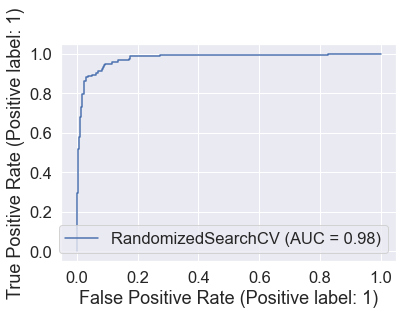

In [246]:
# ROC-кривая и расчет AUC метрики
RocCurveDisplay.from_estimator(rs_log_reg, X_test, y_test)

In [247]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[241  25]
 [  9 143]]


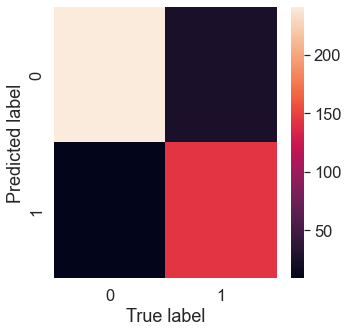

In [248]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_pred)

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       266
           1       0.85      0.94      0.89       152

    accuracy                           0.92       418
   macro avg       0.91      0.92      0.91       418
weighted avg       0.92      0.92      0.92       418



# Выгрузка результатов

In [250]:
index = test['PassengerId']
pred = pd.DataFrame({"PassengerId": index, "Survived": y_pred})
pred.reset_index(drop=True, inplace = True)
pred.to_csv('submission.csv', index = False)